In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Multiclass Text Classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn import svm
from sklearn.svm import LinearSVC

# Naive Bayes Classifiers (Bernoulli and Multinomial)
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

In [97]:
p = 0.20 # 10% of sample
df = pd.read_csv('/Users/omaral-shammary/Downloads/complaints.csv', header=0,
                skiprows=lambda i: i>0 and random.random() > p)

/var/folders/0s/58tfs8qd0znfdgvyk7n49gs00000gn/T/ipykernel_3325/763371577.py:2: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



In [98]:
len(df)

610922

In [99]:
# Randomally selected 20,000 samples to test our model
#df = df.sample(n=20000)
#len(df)

In [100]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [101]:
df = df.rename(columns={'Consumer disputed?': 'Consumer_disputed?',
                   'Company response to consumer': 'company_response_to_consumer',
                       'Date received': 'Date_received'})

In [254]:
# Building the variables for our graphs
disputed = df['Consumer_disputed?'].value_counts()
company_response = df['company_response_to_consumer'].value_counts()
top5_disputed = df['Company'].loc[df['Consumer_disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = df['Company'].loc[df['Consumer_disputed?'] == 'No'].value_counts()[:5]

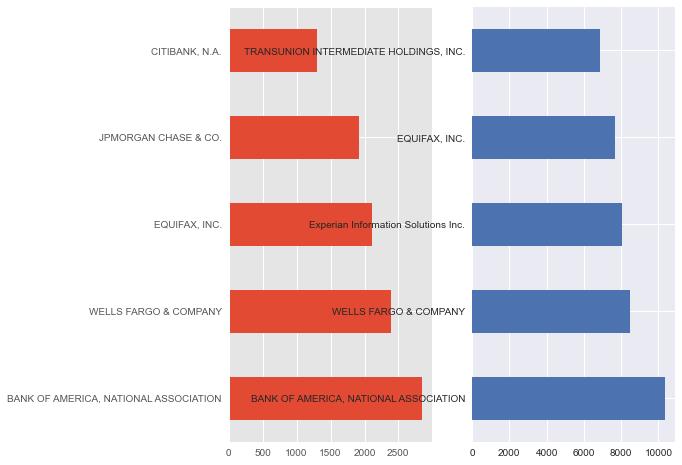

In [256]:
fig=plt.figure(figsize=(8,8))

ax1=plt.subplot(1,2,1)
top5_disputed.plot(kind='barh');
plt.style.use('seaborn')

ax2=plt.subplot(1,2,2)
top5_nodispute.plot(kind='barh')
plt.style.use('ggplot')

plt.show()

In [103]:
#pip install chart_studio

In [104]:
# Plotly libraries
import plotly.subplots as tls
#import plotly.express as px
from chart_studio import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [196]:
#Top three subplots
total_complaints_plotly = go.Bar(
            x=disputed.index.values,
            y=disputed.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['#40FF00', '#FF0000'])
    )

top5_disputes_plotly = go.Bar(
            x=top5_disputed.index.values,
            y=top5_disputed.values,
    text='Disputes',
    showlegend=False,
    marker=dict(
        color=top5_disputed.values,
        colorscale='Reds')
    )

top5_nodisputes_plotly = go.Bar(
            x=top5_nodispute.index.values,
            y=top5_nodispute.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=top5_nodispute.values,
        colorscale='Blues')
    )

# Lower Subplot
customer_res_plotly = go.Bar(
            x=company_response.index.values,
            y=company_response.values,
    text='Customer Response',
    showlegend=False,
        marker=dict(
        color=df['company_response_to_consumer'].value_counts().values,
        colorscale = [[0.0, '#A11818'], [0.1, '#1E5C9A'], [0.2, '#F46D43'], 
                      [0.3, '#FDAE61'], [0.4, 'rgb(254,224,144)'], 
                      [0.5, 'rgb(224,243,248)'], [0.6, 'rgb(171,217,233)'], 
                      [0.7, 'rgb(116,173,209)'], [0.8, 'rgb(69,117,180)'], 
                      [1.0, 'rgb(49,54,149)']],
        reversescale = True
        )
)


fig = tls.make_subplots(rows=2, cols=3, specs=[[{}, {}, {}], [{'colspan': 3}, None, None]],
                          subplot_titles=('Did the Customer File a Dispute?',
                                          #'Disputes',
                                         #'No Disputes',
                                         'Customer Response'))

# First three Subplots
fig.append_trace(total_complaints_plotly, 1, 1)
fig.append_trace(top5_disputes_plotly , 1, 2)
fig.append_trace(top5_nodisputes_plotly , 1, 3)

# Lower Subplot
fig.append_trace(customer_res_plotly, 2, 1)



fig['layout'].update(showlegend=True, height=600, width=800, title='Sectors')
iplot(fig, filename='Complaints')


In [202]:
top5_disputed

BANK OF AMERICA, NATIONAL ASSOCIATION     2846
WELLS FARGO & COMPANY                     2385
EQUIFAX, INC.                             2104
JPMORGAN CHASE & CO.                      1922
CITIBANK, N.A.                            1294
Ocwen Financial Corporation               1138
TRANSUNION INTERMEDIATE HOLDINGS, INC.    1111
Name: Company, dtype: int64

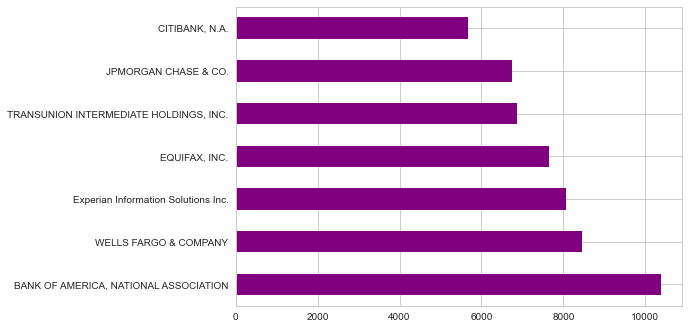

In [275]:
t = df['Company'].loc[df['Consumer_disputed?'] == 'No'].value_counts()[:7]
t.plot(kind='barh', color='purple')
plt.style.use('seaborn-whitegrid')

In [206]:
import seaborn as sns

sns.countplot(x='Company', data=top5_disputed)
#top5_disputed.plot(kind='bar')

NameError: name 'Company' is not defined

In [ ]:
seaborn.barplot(x=df..value_counts().index, 
                y=df.reputation.value_counts())


In [106]:
df.columns

Index(['Date_received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'company_response_to_consumer',
       'Timely response?', 'Consumer_disputed?', 'Complaint ID'],
      dtype='object')

In [107]:
# Create month and years received for consumer complaints
df['Date_received'] = pd.to_datetime(df['Date_received'])
df['year_received'], df['month_received'] = df['Date_received'].dt.year, df['Date_received'].dt.month
df.head()

,Date_received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,company_response_to_consumer,Timely response?,Consumer_disputed?,Complaint ID,year_received,month_received
0,2022-10-30,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,SC,29501,NaN,NaN,Web,2022-10-30,In progress,Yes,NaN,6144361,2022,10
1,2022-10-26,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,NC,28304,NaN,NaN,Web,2022-10-26,In progress,Yes,NaN,6132273,2022,10
2,2022-10-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,KY,42101,NaN,Other,Web,2022-10-23,In progress,Yes,NaN,6116560,2022,10
3,2022-10-26,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,NJ,08052,NaN,NaN,Web,2022-10-26,In progress,Yes,NaN,6131960,2022,10
4,2022-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,PA,19131,NaN,NaN,Web,2022-10-26,In progress,Yes,NaN,6125183,2022,10


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610922 entries, 0 to 610921
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date_received                 610922 non-null  datetime64[ns]
 1   Product                       610922 non-null  object        
 2   Sub-product                   563594 non-null  object        
 3   Issue                         610922 non-null  object        
 4   Sub-issue                     474529 non-null  object        
 5   Consumer complaint narrative  219163 non-null  object        
 6   Company public response       264747 non-null  object        
 7   Company                       610922 non-null  object        
 8   State                         602851 non-null  object        
 9   ZIP code                      602780 non-null  object        
 10  Tags                          69563 non-null   object        
 11  Consumer cons

In [109]:
#df.iloc['year_received']
# df['date'] = pd.to_datetime(df['Date_received'])  


# mask = (df['date'] > '2020-01-01') & (df['date'] <= '2022-01-01')
# df.iloc(mask)

tenyr = df[(df['Date_received'] >= '2012/01/01') & (df['Date_received'] <= '2022/01/01')]

In [110]:
# Months with the highest disputes (We will make a barplot)
def customerservice_per_month(month, dispute):
    result = df.loc[(df['month_received'] == month) & (df['Consumer_disputed?'] == dispute)]
    return result

# Monthly Disputes
dis_january = len(customerservice_per_month(month=1, dispute='Yes'))
dis_february = len(customerservice_per_month(month=2, dispute='Yes'))
dis_march = len(customerservice_per_month(month=3, dispute='Yes'))
dis_april = len(customerservice_per_month(month=4, dispute='Yes'))
dis_may = len(customerservice_per_month(month=5, dispute='Yes'))
dis_june = len(customerservice_per_month(month=6, dispute='Yes'))
dis_july = len(customerservice_per_month(month=7, dispute='Yes'))
dis_august = len(customerservice_per_month(month=8, dispute='Yes'))
dis_september = len(customerservice_per_month(month=9, dispute='Yes'))
dis_october = len(customerservice_per_month(month=10, dispute='Yes'))
dis_november = len(customerservice_per_month(month=11, dispute='Yes'))
dis_december = len(customerservice_per_month(month=12, dispute='Yes'))

# Monthly No-Disputes
nodis_january = len(customerservice_per_month(month=1, dispute='No'))
nodis_february = len(customerservice_per_month(month=2, dispute='No'))
nodis_march = len(customerservice_per_month(month=3, dispute='No'))
nodis_april = len(customerservice_per_month(month=4, dispute='No'))
nodis_may = len(customerservice_per_month(month=5, dispute='No'))
nodis_june = len(customerservice_per_month(month=6, dispute='No'))
nodis_july = len(customerservice_per_month(month=7, dispute='No'))
nodis_august = len(customerservice_per_month(month=8, dispute='No'))
nodis_september = len(customerservice_per_month(month=9, dispute='No'))
nodis_october = len(customerservice_per_month(month=10, dispute='No'))
nodis_november = len(customerservice_per_month(month=11, dispute='No'))
nodis_december = len(customerservice_per_month(month=12, dispute='No'))

In [111]:
# Most active months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']
disputes_by_month = [dis_january, dis_february, dis_march, dis_april, dis_may, dis_june, dis_july, dis_august, dis_september,
                    dis_october, dis_november, dis_december]

nodisputes_by_month = [nodis_january, nodis_february, nodis_march, nodis_april, nodis_may, nodis_june, nodis_july, 
                       nodis_august, nodis_september, nodis_october, nodis_november, nodis_december]


In [112]:
disputes_chart = go.Bar(
    y=months,
    x=disputes_by_month,
    orientation='h',
    name='Disputes',
    text='Disputes',
    marker=dict(
        color='#FF6464',
    line=dict(
        color='#CD3333',
        width=1.5
    ))
)

nodisputes_chart = go.Bar(
    y=months,
    x=nodisputes_by_month,
    orientation='h',
    name='No Disputes',
    text='No Disputes',
    marker=dict(
        color='#7FFF00',
    line=dict(
        color='#59AF59',
        width=1.5
    ))
)

fig = tls.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Dispute Chart by Month',
                                          'No Dispute Chart by Month'))

fig.append_trace(disputes_chart, 1, 1)
fig.append_trace(nodisputes_chart, 1, 2)

fig['layout'].update(showlegend=True, title="Level of Activity by Month")
iplot(fig)

In [113]:
df.Date_received.dt.year.unique()

array([2022, 2021, 2019, 2014, 2016, 2015, 2020, 2017, 2012, 2013, 2018,
       2011])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610922 entries, 0 to 610921
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date_received                 610922 non-null  datetime64[ns]
 1   Product                       610922 non-null  object        
 2   Sub-product                   563594 non-null  object        
 3   Issue                         610922 non-null  object        
 4   Sub-issue                     474529 non-null  object        
 5   Consumer complaint narrative  219163 non-null  object        
 6   Company public response       264747 non-null  object        
 7   Company                       610922 non-null  object        
 8   State                         602851 non-null  object        
 9   ZIP code                      602780 non-null  object        
 10  Tags                          69563 non-null   object        
 11  Consumer cons

In [115]:
# Data every two years from 2012 to 2021

df2012 = df[df.Date_received.dt.year==2012]
df2014 = df[df.Date_received.dt.year==2014]
df2016 = df[df.Date_received.dt.year==2016]
df2018 = df[df.Date_received.dt.year==2018]
df2020 = df[df.Date_received.dt.year==2020]
df2021 = df[df.Date_received.dt.year==2021]


# Monthwise complaints for the Year 2012
Complaints_2012 = df2012.groupby(df2012.Date_received.dt.month).agg({'Complaint ID':'count'})
Complaints_2012['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Complaints_2012.set_index('month',drop=True,inplace=True)
Complaints_2012.rename(columns={'Complaint ID':'no_of_complaints'},inplace=True)

# Monthwise complaints for the Year 2014
Complaints_2014 = df2014.groupby(df2014.Date_received.dt.month).agg({'Complaint ID':'count'})
Complaints_2014['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Complaints_2014.set_index('month',drop=True,inplace=True)
Complaints_2014.rename(columns={'Complaint ID':'no_of_complaints'},inplace=True)

# Monthwise complaints for the Year 2016
Complaints_2016 = df2016.groupby(df2016.Date_received.dt.month).agg({'Complaint ID':'count'})
Complaints_2016['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Complaints_2016.set_index('month',drop=True,inplace=True)
Complaints_2016.rename(columns={'Complaint ID':'no_of_complaints'},inplace=True)

# Monthwise complaints for the Year 2018
Complaints_2018 = df2018.groupby(df2018.Date_received.dt.month).agg({'Complaint ID':'count'})
Complaints_2018['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Complaints_2018.set_index('month',drop=True,inplace=True)
Complaints_2018.rename(columns={'Complaint ID':'no_of_complaints'},inplace=True)

# Monthwise complaints for the Year 2020
Complaints_2020 = df2020.groupby(df2020.Date_received.dt.month).agg({'Complaint ID':'count'})
Complaints_2020['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Complaints_2020.set_index('month',drop=True,inplace=True)
Complaints_2020.rename(columns={'Complaint ID':'no_of_complaints'},inplace=True)

# Monthwise complaints for the Year 2021
Complaints_2021 = df2021.groupby(df2021.Date_received.dt.month).agg({'Complaint ID':'count'})
Complaints_2021['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec']
Complaints_2021.set_index('month',drop=True,inplace=True)
Complaints_2021.rename(columns={'Complaint ID':'no_of_complaints'},inplace=True)

print('Complaints for the Year 2012 :','\n',Complaints_2012)
print('\nComplaints for the Year 2014 :','\n',Complaints_2014)
print('\nComplaints for the Year 2016 :','\n',Complaints_2016)
print('\nComplaints for the Year 2018 :','\n',Complaints_2018)
print('Complaints for the Year 2020 :','\n',Complaints_2020)
print('\nComplaints for the Year 2021 :','\n',Complaints_2021)


Complaints for the Year 2012 : 
        no_of_complaints
month                  
Jan                 670
Feb                 701
Mar                1214
Apr                1146
May                1566
Jun                1613
Jul                1391
Aug                1367
Sep                1090
Oct                1336
Nov                1235
Dec                1257

Complaints for the Year 2014 : 
        no_of_complaints
month                  
Jan                2492
Feb                2551
Mar                2842
Apr                2792
May                2457
Jun                2459
Jul                2704
Aug                2645
Sep                2421
Oct                2578
Nov                2244
Dec                2354

Complaints for the Year 2016 : 
        no_of_complaints
month                  
Jan                2785
Feb                2785
Mar                3341
Apr                3087
May                3028
Jun                3258
Jul                3245
Aug        

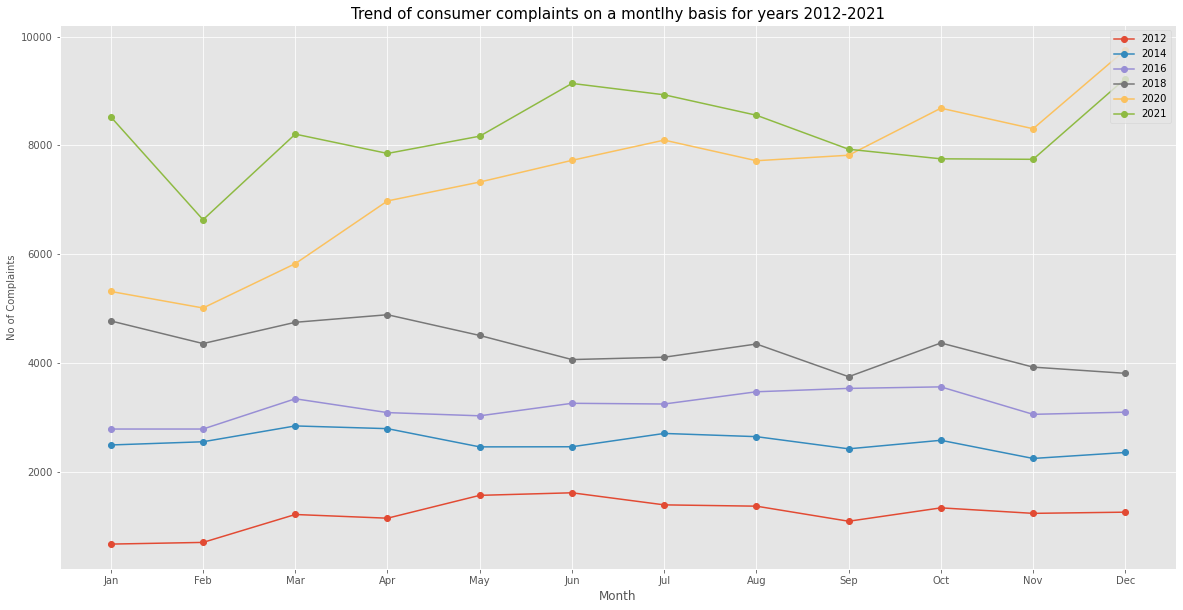

In [116]:
plt.figure(figsize=(20,10))
plt.plot(Complaints_2012,marker='o',label='2012')
plt.plot(Complaints_2014,marker='o',label='2014')
plt.plot(Complaints_2016,marker='o',label='2016')
plt.plot(Complaints_2018,marker='o',label='2018')
plt.plot(Complaints_2020,marker='o',label='2020')
plt.plot(Complaints_2021,marker='o',label='2021')
#plt.grid()
plt.style.use('ggplot')
plt.xlabel('Month')
plt.ylabel('No of Complaints', size = 10)
plt.legend(loc='upper right')
plt.title('Trend of consumer complaints on a montlhy basis for years 2012-2021', size=15)
plt.show()

<AxesSubplot:>

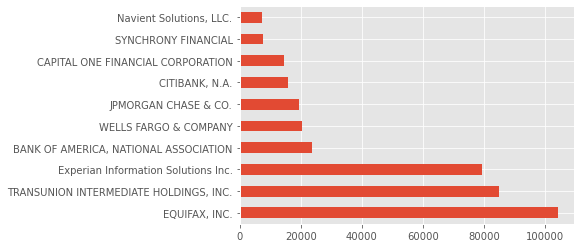

In [146]:
top10 = df.Company.value_counts().sort_values(ascending=False)
top10[:10].plot(kind='barh')

In [128]:
# df = df.rename(columns={'Timely Response?': 'timely_response'})

# df2 = df.groupby(['Company','timely_response']).agg({'timely_response':'count'})
# df2.columns = ['No_of_Complaints']
# df2 = df2.reset_index()

# timely_response = df2.query('timely_response'=="Yes")
# late_response = df2.query('timely_response'=="No")



# timely_response = timely_response.drop('timely_response',axis=1)
# late_response = late_response.drop('timely_response',axis=1)
# timely_response.rename(columns = {'No_of_Complaints':'timely_response'},inplace=True)
# late_response.rename(columns = {'No_of_Complaints':'late_response'},inplace=True)
# timely_response.set_index('Company',inplace=True)
# late_response.set_index('Company',inplace=True)
# timely_or_late_response = pd.concat([timely_response,late_response],axis=1)
# timely_or_late_response['total_complaints'] = timely_response.timely_response+late_response.late_response


# timely_or_late_response.sort_values('total_complaints',ascending=False,inplace=True)
# timely_or_late_response.head(10)

In [216]:
sort = df.groupby(['year_received', 'Consumer_disputed?'])['Company'].apply(lambda 
                                                                     x: x.value_counts())

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610922 entries, 0 to 610921
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date_received                 610922 non-null  datetime64[ns]
 1   Product                       610922 non-null  object        
 2   Sub-product                   563594 non-null  object        
 3   Issue                         610922 non-null  object        
 4   Sub-issue                     474529 non-null  object        
 5   Consumer complaint narrative  219163 non-null  object        
 6   Company public response       264747 non-null  object        
 7   Company                       610922 non-null  object        
 8   State                         602851 non-null  object        
 9   ZIP code                      602780 non-null  object        
 10  Tags                          69563 non-null   object        
 11  Consumer cons

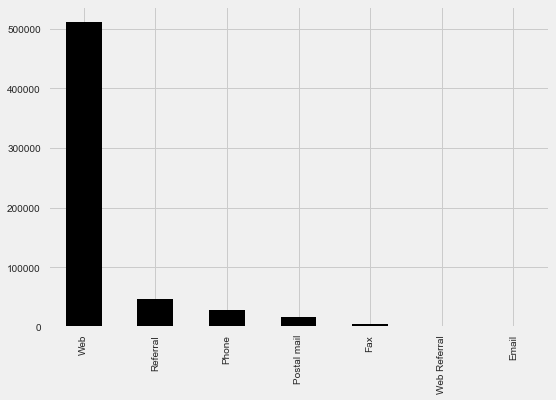

In [288]:
df['Submitted via'].value_counts().plot(kind='bar', color='black')
plt.style.use('fivethirtyeight')